In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cas-train/cas_train.csv
/kaggle/input/cascsv/cas.csv


In [2]:
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('../input/cas-train/cas_train.csv')

In [4]:
df.shape

(224647, 63)

In [5]:
df.head()

,Unnamed: 0,X,Y,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,claimAmount
0,5,1838932.0,5519398.0,0.0,0.0,0.0,1.0,0.0,East,2014/2015,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Heavy rain,2445277.0
1,13,1574177.0,5179893.0,0.0,0.0,0.0,1.0,0.0,East,2000/2001,...,0.0,1.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,9666791.0
2,17,1767091.0,5912669.0,0.0,0.0,0.0,1.0,0.0,South,2010/2011,...,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,3703142.0
3,18,1746990.0,5915134.0,0.0,0.0,0.0,2.0,0.0,None,2005/2006,...,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,8725516.0
4,20,1746822.0,5918596.0,0.0,0.0,0.0,2.0,0.0,South,2005/2006,...,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,13734963.0


In [6]:
df1 = pd.get_dummies(df[['crashFinancialYear', 'crashSHDescription', 'light', 'urban']])
df2 = df[['crashYear', 'X', 'Y', 'bicycle', 'bridge', 'region', 'bus', 'carStationWagon', 'cliffBank', 'debris', 'fatalCount', 'crashSeverity','fence', 'guardRail', 'minorInjuryCount', 'NumberOfLanes', 'parkedVehicle', 'seriousInjuryCount', 'speedLimit', 'unknownVehicleType', 'claimAmount']]

In [7]:
df3 = pd.concat([df1, df2], axis=1, join='inner')
df3.shape

(224647, 53)

In [8]:
df3 = df3.set_index(['region', 'crashYear'])

In [9]:
np.random.seed(108)
mask = np.random.rand(len(df3)) <= 0.8
df_train = df3[mask]
df_test = df3[~mask]

In [10]:
df_train.shape

(179808, 51)

In [11]:
df_test.shape

(44839, 51)

In [12]:
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [13]:
df3.columns

Index(['crashFinancialYear_1999/2000', 'crashFinancialYear_2000/2001',
       'crashFinancialYear_2001/2002', 'crashFinancialYear_2002/2003',
       'crashFinancialYear_2003/2004', 'crashFinancialYear_2004/2005',
       'crashFinancialYear_2005/2006', 'crashFinancialYear_2006/2007',
       'crashFinancialYear_2007/2008', 'crashFinancialYear_2008/2009',
       'crashFinancialYear_2009/2010', 'crashFinancialYear_2010/2011',
       'crashFinancialYear_2011/2012', 'crashFinancialYear_2012/2013',
       'crashFinancialYear_2013/2014', 'crashFinancialYear_2014/2015',
       'crashFinancialYear_2015/2016', 'crashFinancialYear_2016/2017',
       'crashFinancialYear_2017/2018', 'crashFinancialYear_2018/2019',
       'crashFinancialYear_2019/2020', 'crashFinancialYear_2020/2021',
       'crashSHDescription_No', 'crashSHDescription_Unknown',
       'crashSHDescription_Yes', 'light_Bright sun', 'light_Dark',
       'light_Overcast', 'light_Twilight', 'light_Unknown', 'urban_Open',
       'urban_Ur

In [14]:
df3.head()

crashFinancialYear_1999/2000  \
region                    crashYear                                 
Manawatū-Whanganui Region 2014                                  0   
Canterbury Region         2000                                  0   
Auckland Region           2010                                  0   
                          2006                                  0   
                          2006                                  0   

                                     crashFinancialYear_2000/2001  \
region                    crashYear                                 
Manawatū-Whanganui Region 2014                                  0   
Canterbury Region         2000                                  1   
Auckland Region           2010                                  0   
                          2006                                  0   
                          2006                                  0   

                                     crashFinancialYear_2001/2002  \
region                    crashYear                                 
Manawatū-Whanganui Region 2014                                  0   
Canterbury Region         2000                                  0   
Auckland Region           2010                                  0   
                          2006                                  0   
                          2006                                  0   

                                     crashFinancialYear_2002/2003  \
region                    crashYear                                 
Manawatū-Whanganui Region 2014                                  0   
Canterbury Region         2000                                  0   
Auckland Region           2010                                  0   
                          2006                                  0   
                          2006                                  0   

                                     crashFinancialYear_2003/2004  \
region                    crashYear                                 
Manawatū-Whanganui Region 2014                                  0   
Canterbury Region         2000                                  0   
Auckland Region           2010                                  0   
                          2006                                  0   
                          2006                                  0   

                                     crashFinancialYear_2004/2005  \
region                    crashYear                                 
Manawatū-Whanganui Region 2014                                  0   
Canterbury Region         2000                                  0   
Auckland Region           2010                                  0   
                          2006                                  0   
                          2006                                  0   

                                     crashFinancialYear_2005/2006  \
region                    crashYear                                 
Manawatū-Whanganui Region 2014                                  0   
Canterbury Region         2000                                  0   
Auckland Region           2010                                  0   
                          2006                                  1   
                          2006                                  1   

                                     crashFinancialYear_2006/2007  \
region                    crashYear                                 
Manawatū-Whanganui Region 2014                                  0   
Canterbury Region         2000                                  0   
Auckland Region           2010                                  0   
                          2006                                  0   
                          2006                                  0   

                                     crashFinancialYear_2007/2008  \
region                    crashYear                                 
Manawatū-Whanganui Region 2

In [15]:
df3.columns

Index(['crashFinancialYear_1999/2000', 'crashFinancialYear_2000/2001',
       'crashFinancialYear_2001/2002', 'crashFinancialYear_2002/2003',
       'crashFinancialYear_2003/2004', 'crashFinancialYear_2004/2005',
       'crashFinancialYear_2005/2006', 'crashFinancialYear_2006/2007',
       'crashFinancialYear_2007/2008', 'crashFinancialYear_2008/2009',
       'crashFinancialYear_2009/2010', 'crashFinancialYear_2010/2011',
       'crashFinancialYear_2011/2012', 'crashFinancialYear_2012/2013',
       'crashFinancialYear_2013/2014', 'crashFinancialYear_2014/2015',
       'crashFinancialYear_2015/2016', 'crashFinancialYear_2016/2017',
       'crashFinancialYear_2017/2018', 'crashFinancialYear_2018/2019',
       'crashFinancialYear_2019/2020', 'crashFinancialYear_2020/2021',
       'crashSHDescription_No', 'crashSHDescription_Unknown',
       'crashSHDescription_Yes', 'light_Bright sun', 'light_Dark',
       'light_Overcast', 'light_Twilight', 'light_Unknown', 'urban_Open',
       'urban_Ur

In [16]:
df3.sort_values(by=["crashYear"], ascending=True, inplace=True)

In [17]:
# Because this is panel data so I will split each country_Region's data 
def train_test_split(data):
    size=int(len(data)*0.8)
    # for train data will be collected from each country's data which index is from 0-size (80%)
    x_train =data.drop(columns=['claimAmount']).iloc[0:size] 
    # for test data will be collected from each country's  data which index is from size to the end (20%)
    x_test = data.drop(columns=['claimAmount']).iloc[size:]
    y_train=data['claimAmount'].iloc[0:size] 
    y_test=data['claimAmount'].iloc[size:] 
    return x_train, x_test,y_train,y_test

In [18]:
regions =list(set(df3.crashSeverity))
# loop each country_Region and split the data into train and test data 
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
for i in range(0,len(regions)):
    data=df3[df3['crashSeverity']==regions[i]]
    # applied the function I created above
    x_train, x_test,y_train,y_test=train_test_split(data) 
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)

In [19]:
X_train[0].head()

crashFinancialYear_1999/2000  \
region            crashYear                                 
Otago Region      2018                                  0   
Northland Region  2019                                  0   
                  2019                                  0   
Canterbury Region 2020                                  0   

                             crashFinancialYear_2000/2001  \
region            crashYear                                 
Otago Region      2018                                  0   
Northland Region  2019                                  0   
                  2019                                  0   
Canterbury Region 2020                                  0   

                             crashFinancialYear_2001/2002  \
region            crashYear                                 
Otago Region      2018                                  0   
Northland Region  2019                                  0   
                  2019                                  0   
Canterbury Region 2020                                  0   

                             crashFinancialYear_2002/2003  \
region            crashYear                                 
Otago Region      2018                                  0   
Northland Region  2019                                  0   
                  2019                                  0   
Canterbury Region 2020                                  0   

                             crashFinancialYear_2003/2004  \
region            crashYear                                 
Otago Region      2018                                  0   
Northland Region  2019                                  0   
                  2019                                  0   
Canterbury Region 2020                                  0   

                             crashFinancialYear_2004/2005  \
region            crashYear                                 
Otago Region      2018                                  0   
Northland Region  2019                                  0   
                  2019                                  0   
Canterbury Region 2020                                  0   

                             crashFinancialYear_2005/2006  \
region            crashYear                                 
Otago Region      2018                                  0   
Northland Region  2019                                  0   
                  2019                                  0   
Canterbury Region 2020                                  0   

                             crashFinancialYear_2006/2007  \
region            crashYear                                 
Otago Region      2018                                  0   
Northland Region  2019                                  0   
                  2019                                  0   
Canterbury Region 2020                                  0   

                             crashFinancialYear_2007/2008  \
region            crashYear                                 
Otago Region      2018                                  0   
Northland Region  2019                                  0   
                  2019                                  0   
Canterbury Region 2020                                  0   

                             crashFinancialYear_2008/2009  ...  fatalCount  \
region            crashYear                                ...               
Otago Region      2018                                  0  ...         0.0   
Northland Region  2019                                  0  ...         0.0   
                  2019                                  0  ...         0.0   
Canterbury Region 2020                                  0  ...         0.0   

                                crashSeverity  fence  guardRail  \
region            crashYear                                       
Otago Region      2018       Non-Injury Crash    0.0        0.0   
Northland Region  2019       Non-Injury Crash    0.0    

In [20]:
Y_train[0].head()

region             crashYear
Otago Region       2018         4245829.0
Northland Region   2019         3147060.0
                   2019         3443525.0
Canterbury Region  2020         3623060.0
Name: claimAmount, dtype: float64

In [21]:
y_train.shape

(34304,)

In [22]:
# concatenate each train dataset in X_train list and Y_train list respectively 
X_train=pd.concat(X_train)
Y_train=pd.DataFrame(pd.concat(Y_train))
# concatenate each test dataset in X_test list and Y_test list respectively
X_test=pd.concat(X_test)
Y_test=pd.DataFrame(pd.concat(Y_test))

In [23]:
X_train.shape

(179716, 50)

In [24]:
encoder = LabelEncoder()
train_data=pd.DataFrame()
train_data[X_train.columns]=X_train
train_data[Y_train.columns]=Y_train
train_data['crashSeverity']= encoder.fit_transform(train_data['crashSeverity'])
#combine X test and Y test as test data 
test_data=pd.DataFrame()
test_data[X_test.columns]=X_test
test_data[Y_test.columns]=Y_test
test_data['crashSeverity']= encoder.fit_transform(test_data['crashSeverity'])

In [25]:
# using the function to obtian reshaped x_train,x_test,y_train,y_test
#x_train,x_test,y_train,y_test=reshape_data(train_data,test_data)

In [26]:
# Split train data to X and y
x_train = train_data.iloc[:, :-1].values
y_train = train_data.loc[:,['claimAmount']]
# Split test data to X and y
x_test = test_data.iloc[:, :-1].values
y_test = test_data.loc[:,['claimAmount']]

In [27]:
type(train_data)

pandas.core.frame.DataFrame

In [28]:
# Create a 3D input
def create_dataset (X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X.iloc[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)
    
TIME_STEPS = 5

x_test, y_test = create_dataset(DataFrame(x_test), DataFrame(y_test), TIME_STEPS)

x_train, y_train = create_dataset(DataFrame(x_train), DataFrame(y_train), TIME_STEPS)

print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (179711, 5, 50)
y_train.shape:  (179711, 1)
x_test.shape:  (44926, 5, 50)
y_test.shape:  (44926, 1)


In [29]:
x_train[1][1][33]

6049873.1491

In [30]:
def rmse(y_true, y_pred):
  return k.backend.sqrt(k.backend.mean(k.backend.square(y_pred-y_true)))

In [31]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,                             
              return_sequences=True),
              input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Bidirectional(LSTM(units = units, return_sequences=True)))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(32))
    model.add(Dense(1))
    #Compile model
    model.compile(loss=rmse, optimizer='adam')
    return model# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences=True,
                activation='relu',input_shape = [x_train.shape[1], x_train.shape[2]]))
    model.add(tf.keras.layers.Normalization(axis=-1))
    model.add(Dropout(0.4))
    model.add(m(units = 128))
    model.add(Dropout(0.3))
    model.add(Dense(64))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    #compile model
    model.compile(loss='mae', optimizer='adam', metrics=['mae', rmse])
    return model# BiLSTM
model_bilstm = create_model_bilstm(64)# GRU and LSTM
model_gru = create_model(256, GRU)
model_lstm = create_model(256, LSTM)

2022-04-20 06:31:42.270684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 06:31:42.360664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 06:31:42.361422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 06:31:42.362691: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [32]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 256)            314368    
_________________________________________________________________
normalization_1 (Normalizati (None, 5, 256)            513       
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [46]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 5, 256)            236544    
_________________________________________________________________
normalization (Normalization (None, 5, 256)            513       
_________________________________________________________________
dropout (Dropout)            (None, 5, 256)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [47]:
model_bilstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 5, 128)            58880     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 5, 128)            98816     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 201,025
Trainable params: 201,025
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = k.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(x_train, y_train, epochs = 50, validation_split = 0.2,
                    batch_size = 64, shuffle = False, callbacks = [early_stop])
    
    return history

history_lstm = fit_model(model_lstm)

2022-04-20 06:31:46.515878: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-04-20 06:31:50.366531: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2247/2247 [==============================] - 35s 14ms/step - loss: 4446443.5000 - mae: 4446443.5000 - rmse: 5219520.0000 - val_loss: 9816846.0000 - val_mae: 9816846.0000 - val_rmse: 11120088.0000
Epoch 2/50
2247/2247 [==============================] - 30s 13ms/step - loss: 4352210.5000 - mae: 4352210.5000 - rmse: 5137321.5000 - val_loss: 9653252.0000 - val_mae: 9653252.0000 - val_rmse: 10975053.0000
Epoch 3/50
2247/2247 [==============================] - 31s 14ms/step - loss: 4148003.2500 - mae: 4148003.2500 - rmse: 4961902.0000 - val_loss: 9388310.0000 - val_mae: 9388310.0000 - val_rmse: 10741261.0000
Epoch 4/50
2247/2247 [==============================] - 32s 14ms/step - loss: 3894979.7500 - mae: 3894979.7500 - rmse: 4742407.0000 - val_loss: 9077508.0000 - val_mae: 9077508.0000 - val_rmse: 10468979.0000
Epoch 5/50
2247/2247 [==============================] - 31s 14ms/step - loss: 3528649.5000 - mae: 3528649.5000 - rmse: 4430583.5000 - val_loss: 8615987.0000 - val_mae: 8615987.0000 - 

In [34]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/50
2247/2247 [==============================] - 31s 11ms/step - loss: 5222171.5000 - val_loss: 11139690.0000
Epoch 2/50
2247/2247 [==============================] - 23s 10ms/step - loss: 5185978.5000 - val_loss: 11089078.0000
Epoch 3/50
2247/2247 [==============================] - 23s 10ms/step - loss: 5125866.5000 - val_loss: 11016517.0000
Epoch 4/50
2247/2247 [==============================] - 23s 10ms/step - loss: 5045657.5000 - val_loss: 10923755.0000
Epoch 5/50
2247/2247 [==============================] - 23s 10ms/step - loss: 4946638.5000 - val_loss: 10811504.0000
Epoch 6/50
2247/2247 [==============================] - 23s 10ms/step - loss: 4829650.5000 - val_loss: 10680276.0000
Epoch 7/50
2247/2247 [==============================] - 23s 10ms/step - loss: 4695575.5000 - val_loss: 10530575.0000
Epoch 8/50
2247/2247 [==============================] - 23s 10ms/step - loss: 4545427.0000 - val_loss: 10362954.0000
Epoch 9/50
2247/2247 [==============================] - 23s 10ms

In [35]:
history_gru = fit_model(model_gru)

Epoch 1/50
2247/2247 [==============================] - 39s 16ms/step - loss: 4439090.5000 - mae: 4439090.5000 - rmse: 5213038.5000 - val_loss: 9801441.0000 - val_mae: 9801441.0000 - val_rmse: 11106401.0000
Epoch 2/50
2247/2247 [==============================] - 36s 16ms/step - loss: 4332239.0000 - mae: 4332239.0000 - rmse: 5120071.5000 - val_loss: 9622214.0000 - val_mae: 9622214.0000 - val_rmse: 10947572.0000
Epoch 3/50
2247/2247 [==============================] - 36s 16ms/step - loss: 4129874.7500 - mae: 4129874.7500 - rmse: 4946386.5000 - val_loss: 9375638.0000 - val_mae: 9375638.0000 - val_rmse: 10730232.0000
Epoch 4/50
2247/2247 [==============================] - 36s 16ms/step - loss: 3871912.2500 - mae: 3871912.2500 - rmse: 4722692.0000 - val_loss: 9041573.0000 - val_mae: 9041573.0000 - val_rmse: 10437659.0000
Epoch 5/50
2247/2247 [==============================] - 36s 16ms/step - loss: 3563944.2500 - mae: 3563944.2500 - rmse: 4459400.0000 - val_loss: 8715163.0000 - val_mae: 8715

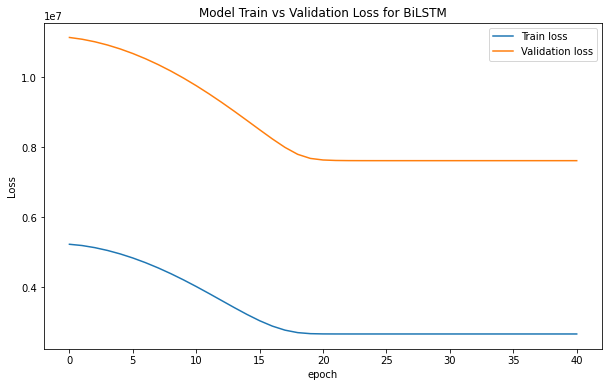

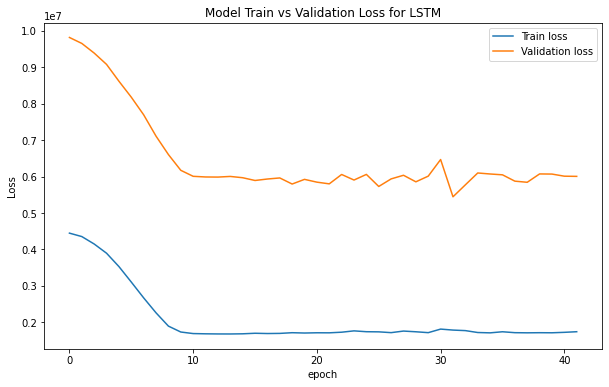

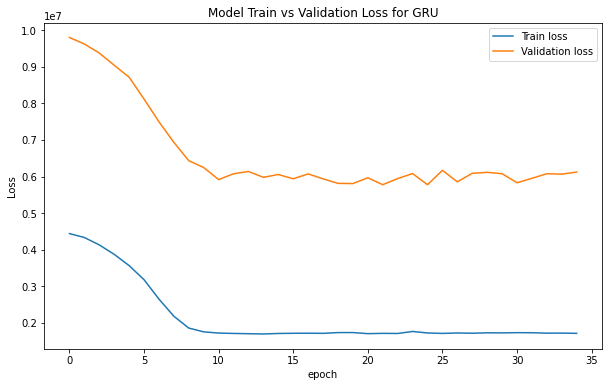

In [36]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)

plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')

In [37]:
def prediction(model):
    prediction = model.predict(x_test)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

In [38]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')

Bidirectional LSTM:
Mean Absolute Error: 2288451.3211
Root Mean Square Error: 3999352.7088

LSTM:
Mean Absolute Error: 2301428.5241
Root Mean Square Error: 4119580.8018

GRU:
Mean Absolute Error: 2321263.2795
Root Mean Square Error: 4163429.8624



In [39]:
prediction_lstm.shape

(44926, 1)

In [40]:
early_stop = k.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)


In [41]:
# design network for confirmed cases data 
model = Sequential()
model.add(LSTM(60,activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae', rmse])
# fit network
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=30, batch_size=50,  verbose=1, shuffle=False, callbacks = [early_stop])

Epoch 1/30
2876/2876 [==============================] - 36s 12ms/step - loss: 2707982.2500 - mae: 2707982.0000 - rmse: 3803289.5000 - val_loss: 7241219.0000 - val_mae: 7241219.0000 - val_rmse: 8888361.0000
Epoch 2/30
2876/2876 [==============================] - 34s 12ms/step - loss: 2671231.7500 - mae: 2671231.7500 - rmse: 3742598.2500 - val_loss: 7445350.0000 - val_mae: 7445350.0000 - val_rmse: 9057980.0000
Epoch 3/30
2876/2876 [==============================] - 34s 12ms/step - loss: 2670393.5000 - mae: 2670393.5000 - rmse: 3743129.5000 - val_loss: 7219128.5000 - val_mae: 7219128.5000 - val_rmse: 8869936.0000
Epoch 4/30
2876/2876 [==============================] - 35s 12ms/step - loss: 2673517.5000 - mae: 2673517.5000 - rmse: 3744485.0000 - val_loss: 7379408.5000 - val_mae: 7379408.5000 - val_rmse: 9003059.0000
Epoch 5/30
2876/2876 [==============================] - 36s 13ms/step - loss: 2677840.0000 - mae: 2677840.0000 - rmse: 3752306.0000 - val_loss: 7377411.5000 - val_mae: 7377411.

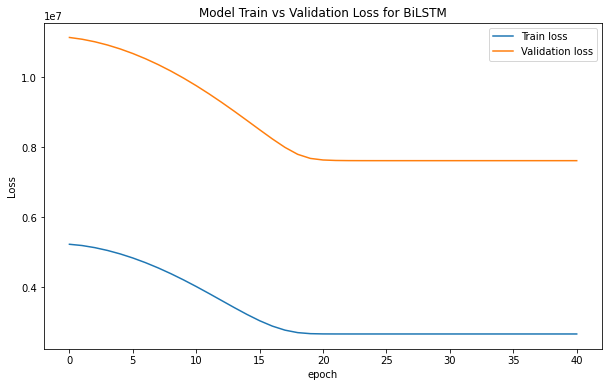

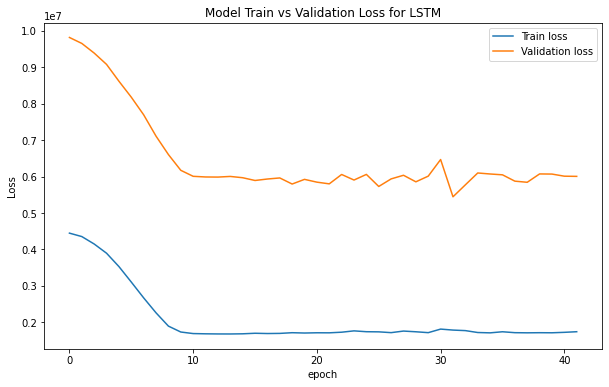

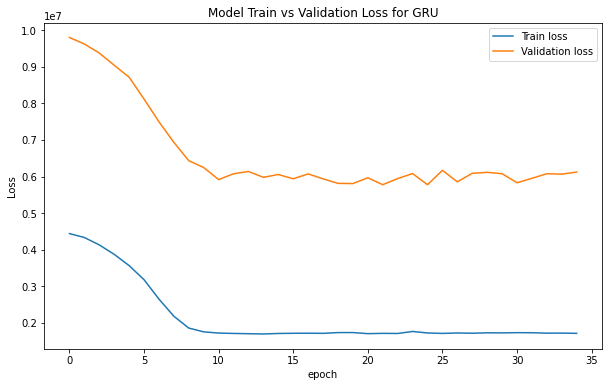

In [42]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)
    
#plot_loss (history, 'lstm')
plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')

In [43]:
def prediction(model):
    prediction = model.predict(x_test)
    return prediction

pred = prediction(model)

In [44]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    
    
evaluate_prediction(pred, y_test, 'lstm')
evaluate_prediction(pred, y_test, 'lstm')
evaluate_prediction(pred, y_test, 'lstm')

lstm:
Mean Absolute Error: 2909256.8231
Root Mean Square Error: 4773453.5194
lstm:
Mean Absolute Error: 2909256.8231
Root Mean Square Error: 4773453.5194
lstm:
Mean Absolute Error: 2909256.8231
Root Mean Square Error: 4773453.5194


In [45]:
# Create a 3D input
def create_dataset (X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)
    
TIME_STEPS = 30

X_test, y_test = create_dataset(x_test, y_test, TIME_STEPS)

X_train, y_train = create_dataset(x_train, y_train, TIME_STEPS)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [ ]:
def rmse(y_true, y_pred):
  return k.backend.sqrt(k.backend.mean(k.backend.square(y_pred-y_true)))

In [ ]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,                             
              return_sequences=True),
              input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Bidirectional(LSTM(units = units, return_sequences=True)))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(32))
    model.add(Dense(1))
    #Compile model
    model.compile(loss=rmse, optimizer='adam')
    return model# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [x_train.shape[1], x_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 32))
    model.add(Dropout(0.2))
    model.add(Dense(units = 16))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss=rmse, optimizer='adam')
    return model# BiLSTM
model_bilstm = create_model_bilstm(64)# GRU and LSTM
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

In [ ]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = k.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.2,
                    batch_size = 64, shuffle = False, callbacks = [early_stop])
    return history

history_lstm = fit_model(model_lstm)

In [ ]:
history_bilstm = fit_model(model_bilstm)

In [ ]:
history_gru = fit_model(model_gru)

In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)

plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')

**Prediction**

In [ ]:
def prediction(model):
    prediction = model.predict(X_test)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')